In [15]:
import math
from matplotlib import pyplot as plt
import numpy as np

In [16]:
def Gaussian(x, mu, sigma2):
    return 1 / math.sqrt(2 * math.pi * sigma2) * math.exp(-0.5 * (x - mu)**2 / sigma2)

def plotG(mu, sigma, *args):
    X = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 101)
    Y = [Gaussian(x, mu=mu, sigma2 = sigma**2) for x in X]
    plt.plot(X, Y, *args)
    plt.grid()

0.24197072451914337


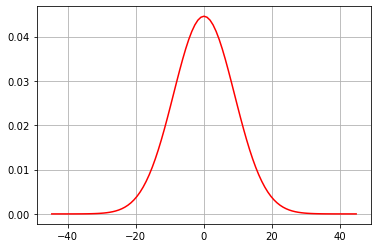

In [58]:
print(Gaussian(1, mu=0, sigma2=1))
#plotG(mu=0, sigma=5)
mu1, var1 = 0, 80
plotG(mu1, math.sqrt(var1), 'r')

In [18]:
def update(mu1, var1, mu2, var2):
    var = 1 / (1 / var1 + 1 / var2)
    mu = (mu1 * var2 + mu2 * var1) / (var1 + var2)
    # print
    return mu, var



1.4285714285714286 0.8571428571428571


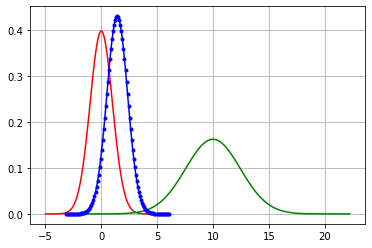

In [26]:
mu1, var1 = 0, 1
plotG(mu1, math.sqrt(var1), 'r')

mu2, var2 = 10, 6
plotG(mu2, math.sqrt(var2), 'g')

mu3, var3 = update(mu1, var1, mu2, var2)
print(mu3,var3)
plotG(mu3, math.sqrt(var3), 'b.-')

In [20]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

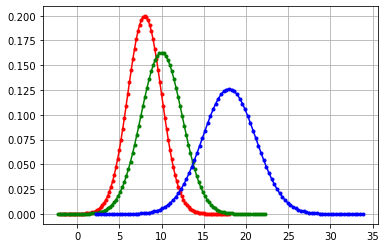

In [21]:
mu, var = predict(8, 4, 10, 6)

plotG(8, math.sqrt(4), 'r.-')
plotG(10, math.sqrt(6), 'g.-')
plotG(mu, math.sqrt(var), 'b.-')

mu = 0, sigma = 100.0


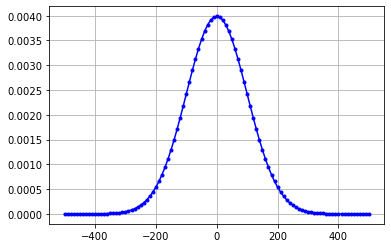

In [55]:
measurements = [7, 8, 15, 10, 11, 12, 13, 14, 15, 16]
measurements_sigma = 4.

motions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
motion_sigma = 2.

mu = 0
sigma = 100.

print(f'{mu = }, {sigma = }')
plotG(mu, sigma, 'b.-')
t = 0

mu = 7.773585, sigma = 5.849057
mu = 7.908046, sigma = 2.375479


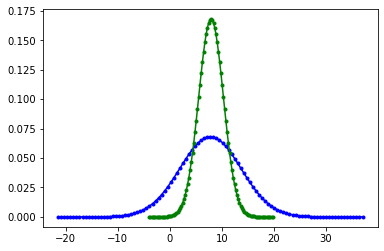

In [57]:
mu, sigma = predict(mu, sigma, motions[t], motion_sigma)
print(f'{mu = :3f}, {sigma = :3f}', flush=True)
plotG(mu, sigma, 'b.-')



mu, sigma = update(mu, sigma, measurements[t], measurements_sigma)
print(f'{mu = :3f}, {sigma = :3f}', flush=True)
plotG(mu, sigma, 'g.-')
t += 1

In [53]:
for t in range(len(measurements)):
    mu, sigma = predict(mu, sigma, motions[t], motion_sigma)
    print(f'{mu = :3f}, {sigma = :3f}', flush=True)
    mu, sigma = update(mu, sigma, measurements[t], measurements_sigma)
    print(f'{mu = :3f}, {sigma = :3f}', flush=True)
    

mu = 7.773585, sigma = 5.849057
mu = 7.314176, sigma = 2.375479
mu = 8.314176, sigma = 4.375479
mu = 8.150046, sigma = 2.089661
mu = 9.150046, sigma = 4.089661
mu = 12.107442, sigma = 2.022167
mu = 13.107442, sigma = 4.022167
mu = 11.549428, sigma = 2.005526
mu = 12.549428, sigma = 4.005526
mu = 11.774179, sigma = 2.001381
mu = 12.774179, sigma = 4.001381
mu = 12.387023, sigma = 2.000345
mu = 13.387023, sigma = 4.000345
mu = 13.193503, sigma = 2.000086
mu = 14.193503, sigma = 4.000086
mu = 14.096750, sigma = 2.000022
mu = 15.096750, sigma = 4.000022
mu = 15.048375, sigma = 2.000005
mu = 16.048375, sigma = 4.000005
mu = 16.024188, sigma = 2.000001


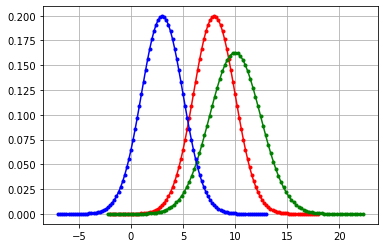

In [36]:
mu, var = predict(1, 2, 2, 2)

plotG(8, math.sqrt(4), 'r.-')
plotG(10, math.sqrt(6), 'g.-')
plotG(mu, math.sqrt(var), 'b.-')


motions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
motion_sigma = 2.



In [74]:
meas1 = [7, 8, 15, 10, 11, 12, 13, 14, 15, 16]
meas2 = [8, 6, 11, 14, 12, 14, 12, 15, 18, 15]
meas1_sigma = 3.
meas2_sigma = 2.

motions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
motion_sigma = 2.

mu = 0.
sigma = 80.

#mu, sigma = predict(mu, sigma, motions[t], motion_sigma)
t=0


mu = 14.600000, sigma = 1.200000
mu = 15.600000, sigma = 3.200000


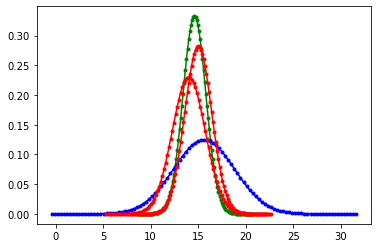

In [82]:
mu, sigma = update(meas1[t], meas1_sigma, meas2[t], meas2_sigma)
print(f'{mu = :3f}, {sigma = :3f}', flush=True)
plotG(mu, sigma, 'g.-')

mu, sigma = predict(mu, sigma, motions[t], motion_sigma)
print(f'{mu = :3f}, {sigma = :3f}', flush=True)
plotG(mu, sigma, 'b.-')

plotG(meas1[t], math.sqrt(meas1_sigma), 'r.-')
plotG(meas2[t], math.sqrt(meas2_sigma), 'r.-')
t+=1